<a href="https://colab.research.google.com/github/moni14-code/dataScience/blob/main/medicalCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Analysis

In [3]:
medical=pd.read_csv('/content/insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


information about the dataset

In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


isnull() -> to check missing values

In [5]:

medical.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
medical.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
medical.describe()    #gives statistical values(mean,median..)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


data distribution

In [8]:
medical['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

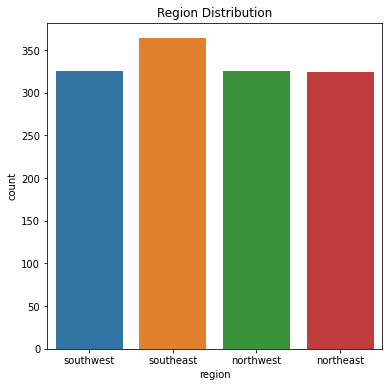

In [9]:

plt.figure(figsize=(6,6))
sns.countplot(x='region',data=medical)
plt.title('Region Distribution')
plt.show()

The data is almost same for all 4 .
Out of 4 regions , southeast has little higher (medical cost) data

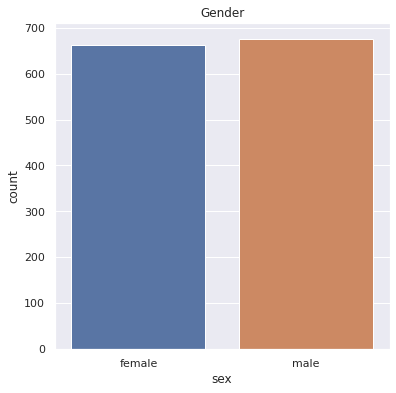

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical)
plt.title('Gender')
plt.show()

In [11]:
medical['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

This countplot throws an insight that male has slightly higher data than female .

In [12]:
medical.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
grp=medical.groupby('region')
grp.get_group('southeast')

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251
...,...,...,...,...,...,...,...
1322,62,male,38.83,0,no,southeast,12981.3457
1323,42,female,40.37,2,yes,southeast,43896.3763
1327,51,male,30.03,1,no,southeast,9377.9047
1330,57,female,25.74,2,no,southeast,12629.1656


1.  0 to NaN 
2.  NaN to 0

In [16]:
medical['children'].replace(0, np.nan, inplace=True)
print(medical)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       NaN    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       NaN     no  northwest  21984.47061
4      32    male  28.880       NaN     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       NaN     no  northeast   2205.98080
1335   18  female  36.850       NaN     no  southeast   1629.83350
1336   21  female  25.800       NaN     no  southwest   2007.94500
1337   61  female  29.070       NaN    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [19]:
medical['children'].replace(np.nan,0,inplace=True)
print(medical)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [21]:
medical['smoker'].replace('no',np.nan,inplace=True)
print(medical)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0    NaN  southeast   1725.55230
2      28    male  33.000       3.0    NaN  southeast   4449.46200
3      33    male  22.705       0.0    NaN  northwest  21984.47061
4      32    male  28.880       0.0    NaN  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0    NaN  northwest  10600.54830
1334   18  female  31.920       0.0    NaN  northeast   2205.98080
1335   18  female  36.850       0.0    NaN  southeast   1629.83350
1336   21  female  25.800       0.0    NaN  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [24]:
group=medical.groupby(['region'])
group.size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [25]:
group.get_group('northeast')

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2.0,NaN,northeast,6406.41070
10,25,male,26.220,0.0,NaN,northeast,2721.32080
16,52,female,30.780,1.0,NaN,northeast,10797.33620
17,23,male,23.845,0.0,NaN,northeast,2395.17155
20,60,female,36.005,0.0,NaN,northeast,13228.84695
...,...,...,...,...,...,...,...
1321,62,male,26.695,0.0,yes,northeast,28101.33305
1325,61,male,33.535,0.0,NaN,northeast,13143.33665
1326,42,female,32.870,0.0,NaN,northeast,7050.02130
1328,23,female,24.225,2.0,NaN,northeast,22395.74424


In [26]:
medical.groupby(['region']).charges.agg([max,min])


,max,min
region,,
northeast,58571.07448,1694.7964
northwest,60021.39897,1621.3402
southeast,63770.42801,1121.8739
southwest,52590.82939,1241.5650
